Test whether/how to use orphics to deal with $W^g$

In [1]:
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np

repoDir= os.getcwd()
os.chdir(os.path.join(repoDir, '../..' ))
repoDir= os.getcwd()
cambPath= repoDir+'/CAMB/CAMB-Jan2017/pycamb'
print cambPath
sys.path.insert(0, cambPath)

import camb
from camb import model, initialpower

from orphics.theory.cosmology import LimberCosmology

import healpy as hp
import scipy
from mpl_toolkits.mplot3d import Axes3D
import time

/Users/Humna/repos/CAMB/CAMB-Jan2017/pycamb


In [2]:
zmin, zmax= 0, 600.
lmax= 1000.
ellrange= np.arange(0, lmax)

In [3]:
limber= LimberCosmology(lmax= lmax, skipCls= True)

Initializing CMB window..
initializing power...


In [4]:
def plot(x, y, xlabel, ylabel, sci= False, xMin= None, xMax= None, title= None):
    plt.clf()
    plt.plot(x, y)
    plt.xlabel(xlabel, fontsize= 18)
    plt.ylabel(ylabel, fontsize= 18)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    #plt.xlim(0,500)
    #plt.ylim(0,0.00002)
    if ((xMin is not None) and (xMax is not None)): plt.xlim(xMin, xMax)
    if title is not None: plt.title(title)
    if sci: plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    fig= plt.gcf()
    #fig.set_size_inches(10.5, 7.5)
    plt.show()

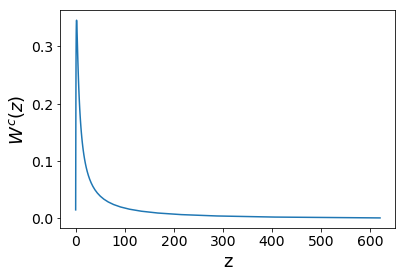

In [5]:
zs= limber.zs
W_c= limber.kernels['cmb']['W']

plot(zs, W_c, 'z', '$W^c(z)$')

In [6]:
def Wg_z(zMin, zMax, bias):
    gkey= str(time.time())
    limber.addStepNz(gkey, bias= bias, zmin= zMin, zmax= zMax)
    return limber.kernels[gkey]['W']

In [7]:
def plotWg(zMin, zMax, bias):
    title= 'zMin, zMax= %s-%s; bias= %s'%(zMin, zMax, bias)
    W_g= Wg_z(zMin, zMax, bias)
    plot(zs, W_g, 'z', '$W^g(z)$', title= title)
    plot(zs, W_g, 'z', '$W^g(z)$', xMin= zMin-1, xMax= zMax+2, title=title)

Initializing galaxy window for  1498607310.72  ...


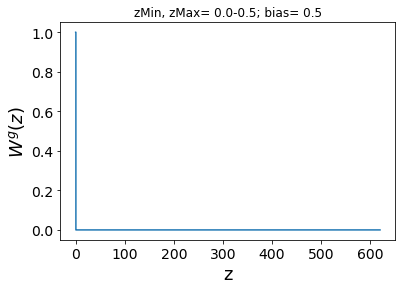

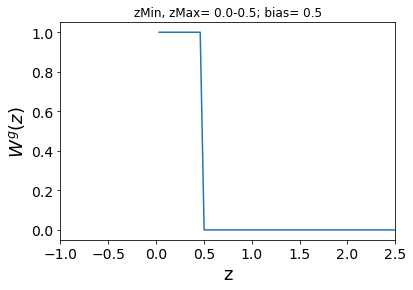

In [8]:
zMin, zMax, bias= 0., 0.5, 0.5
plotWg(zMin, zMax, bias)

Initializing galaxy window for  1498607311.55  ...


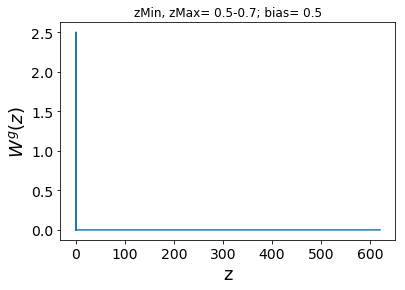

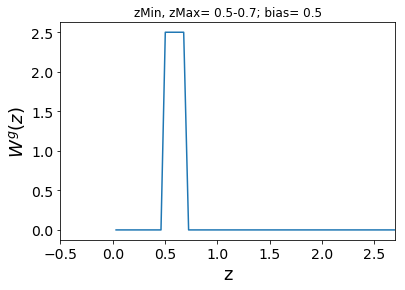

In [9]:
zMin, zMax, bias= 0.5, 0.7, 0.5
plotWg(zMin, zMax, bias)

Initializing galaxy window for  1498607312.33  ...


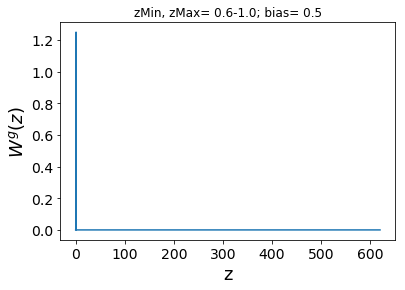

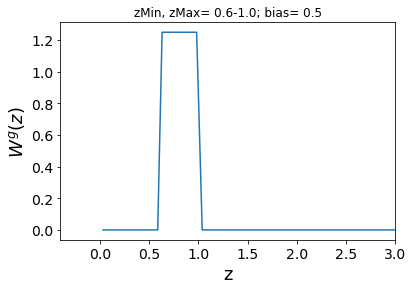

In [10]:
zMin, zMax, bias= 0.6, 1., 0.5
plotWg(zMin, zMax, bias)

Initializing galaxy window for  1498607313.05  ...


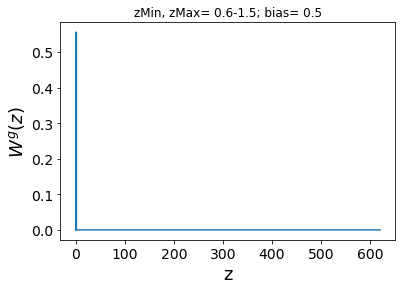

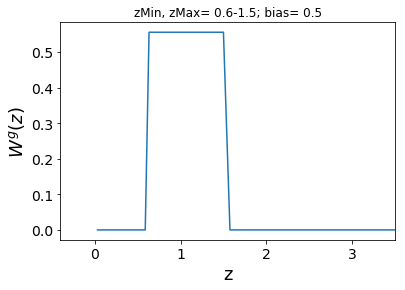

In [11]:
zMin, zMax, bias= 0.6, 1.5, 0.5
plotWg(zMin, zMax, bias)

Initializing galaxy window for  1498607313.8  ...


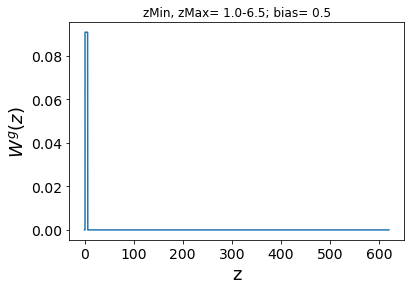

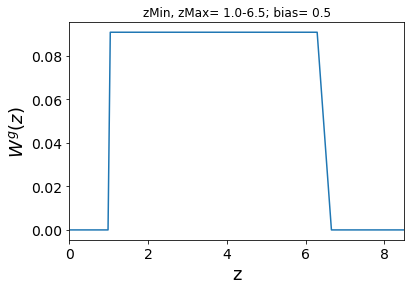

In [12]:
zMin, zMax, bias= 1., 6.5, 0.5
plotWg(zMin, zMax, bias)

Initializing galaxy window for  1498607314.32  ...


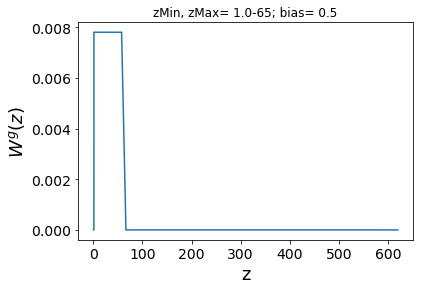

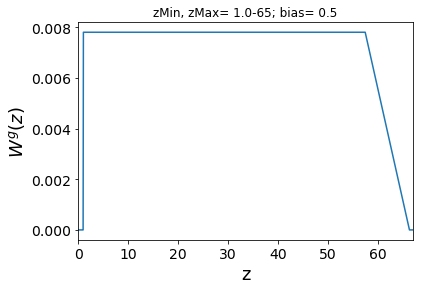

In [13]:
zMin, zMax, bias= 1., 65, 0.5
plotWg(zMin, zMax, bias)

Initializing galaxy window for  1498607315.09  ...


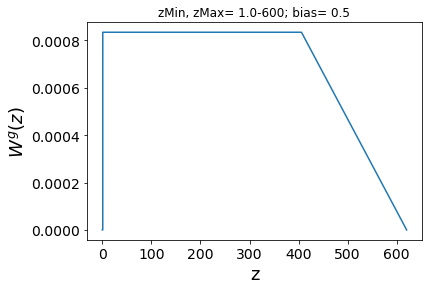

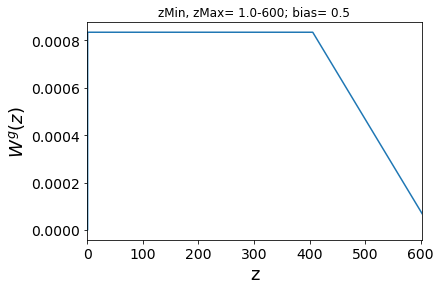

In [14]:
zMin, zMax, bias= 1., 600, 0.5
plotWg(zMin, zMax, bias)

Want flat$W^g$ for all z-bins rn.., i.e., something like:

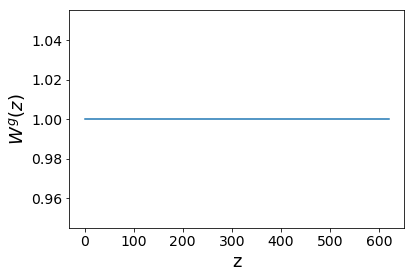

In [15]:
def Wg(z): return np.ones(len(np.array(z)))
plot(zs, Wg(zs), 'z', '$W^g(z)$')

Ok so LimberCosmology step WF works for small $\Delta z$. Or numStep in declaring the LimberCosmology objects needs to be changed to avoid the non-flat drop off the step.